In [1]:
!pip install tabpfn


[notice] A new release of pip available: 22.2 -> 24.0
[notice] To update, run: C:\Users\Aaditya Gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from sklearn.metrics import accuracy_score
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay
from tabpfn import TabPFNClassifier
import pandas as pd
import time
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_hard = pd.read_csv("C:/Users/Aaditya Gupta/OneDrive/Desktop/AML_A2/df_synA_test_hard_shuffled_sample.csv")

In [5]:
df_hard.head(10)

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,data_type
0,0.75,0.75,0.50,0.75,0.0,0.25,0.25,1.00,0.75,0.50,...,0.25,0.00,0.75,1.00,96,456,17,0.00,0.25,validation
1,0.00,0.00,0.00,0.25,0.0,0.00,0.00,0.50,0.25,0.00,...,0.00,1.00,1.00,1.00,109,477,14,1.00,1.00,validation
2,0.00,0.25,0.50,0.00,0.0,0.00,0.00,0.25,0.00,0.50,...,1.00,0.00,0.50,0.00,136,514,0,0.75,0.25,validation
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.75,0.25,...,0.00,0.25,0.25,0.25,109,446,15,1.00,1.00,validation
4,0.75,0.75,0.75,0.75,0.0,0.75,0.75,0.75,0.25,0.75,...,0.50,0.00,0.50,0.75,99,535,3,0.25,0.75,validation
5,0.50,0.50,0.50,0.25,0.0,0.50,0.50,0.25,0.50,0.75,...,0.75,0.00,0.50,0.25,88,535,1,0.25,1.00,validation
6,0.25,0.25,0.25,0.25,0.0,0.25,0.25,1.00,0.25,0.00,...,0.50,0.50,0.50,0.25,95,541,23,0.00,0.25,validation
7,0.25,0.25,0.25,0.75,0.0,0.25,0.25,1.00,0.25,0.00,...,0.50,0.50,0.50,0.50,92,488,16,0.00,0.25,validation
8,0.00,0.25,0.00,0.25,0.0,0.25,0.50,0.25,0.75,0.00,...,1.00,0.50,0.50,0.25,96,521,16,1.00,0.75,validation
9,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.25,0.50,0.25,...,1.00,0.75,0.75,0.50,108,500,16,1.00,1.00,validation


In [6]:
df_hard_ = df_hard.sort_values(by=['row_num'])

In [7]:
df_hard_.reset_index(inplace = True)

In [8]:
df_hard_ = df_hard_.drop(columns=['index'])

In [48]:
df_hard_.head(11)

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,data_type
0,0.25,0.50,0.50,0.5,0.0,0.50,1.00,0.00,0.50,0.00,...,0.25,1.00,1.00,1.00,75,526,7,1.00,1.00,validation
1,0.25,0.25,0.50,0.5,0.0,0.00,0.25,0.50,0.00,0.00,...,0.50,1.00,1.00,0.75,75,380,17,0.00,1.00,validation
2,0.75,0.75,0.75,0.5,0.0,1.00,1.00,0.00,0.00,1.00,...,0.75,0.25,0.00,0.00,75,521,17,0.75,0.75,validation
3,0.75,0.50,0.50,0.5,0.0,0.25,0.50,0.50,0.75,0.75,...,1.00,0.00,0.00,0.25,75,500,17,0.25,1.00,validation
4,1.00,0.75,0.75,0.5,0.0,1.00,1.00,0.00,0.50,1.00,...,1.00,0.25,0.25,0.25,75,488,0,0.75,1.00,validation
5,0.75,0.75,0.50,0.5,0.0,0.00,0.00,1.00,0.50,1.00,...,0.50,0.75,1.00,1.00,75,467,22,0.25,0.75,validation
6,0.50,0.50,0.50,0.5,0.0,1.00,1.00,0.25,0.00,0.25,...,1.00,1.00,0.75,0.75,75,474,15,1.00,1.00,validation
7,0.50,0.75,0.75,0.5,0.0,1.00,1.00,0.00,0.50,0.75,...,0.25,1.00,0.50,0.50,75,514,7,0.00,0.00,validation
8,0.75,0.75,0.50,0.5,0.0,0.50,0.25,0.75,1.00,1.00,...,0.50,0.50,0.50,0.50,75,544,8,1.00,0.75,validation
9,0.50,0.50,0.50,0.5,0.0,1.00,1.00,0.00,0.25,1.00,...,1.00,0.00,0.00,0.00,75,386,7,0.00,0.00,validation


In [49]:
df_hard_['row_num'].unique()

array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
      dtype=int64)

In [12]:
v=df_hard_['era'][0]
count=0
for i in range(len(df_hard_)):
  if(df_hard_['era'][i]==v):
    count+=1
  else:
    v = df_hard_['era'][i]
    print(count)
    count=0

20782
20811
20903
20804
20672
20856
20644
20731
20643
20860
20950


In [9]:
X_data, y_data = df_hard_.drop(columns=['era','target_10_val'	,'target_5_val',	'data_type']), df_hard_['target_10_val']

In [51]:
y_data[:10]

0    1.00
1    0.00
2    0.75
3    0.25
4    0.75
5    0.25
6    1.00
7    0.00
8    1.00
9    0.00
Name: target_10_val, dtype: float64

In [52]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

# Assuming you have time series data
# Preprocess the data (e.g., windowing)
def preprocess_time_series_data(X_data, y_data, window_size):
    print(len(X_data),len(y_data))
    X, y = [], []
    for i in range(0,len(X_data) - window_size):
        X.append(X_data[i:i+window_size])
        y.append(y_data[i+window_size-1])
    return np.array(X), np.array(y)

# Generate example time series data
# time_series_data = np.sin(np.linspace(0, 10, 1000))  # Example sinusoidal time series data
window_size = 10
X, y = preprocess_time_series_data(X_data,y_data, window_size)




249600 249600


In [53]:
X.shape, y.shape

((249590, 10, 26), (249590,))

In [54]:
d={}
y_=[]
count=0
for i in y:
  if i not in d:
    d[i]=count
    count+=1
  y_.append(d[i])


In [55]:
d

{0.0: 0, 0.75: 1, 0.25: 2, 1.0: 3, 0.5: 4}

In [56]:
y_ = np.array(y_)

In [10]:
train_size = int(len(X_data)*0.8)
test_size = len(X_data) - train_size


Epoch 1/100
1997/1997 [==============================] - 71s 34ms/step - loss: 1.3932 - accuracy: 0.3311 - val_loss: 1.3216 - val_accuracy: 0.4020
Epoch 2/100
1997/1997 [==============================] - 66s 33ms/step - loss: 1.3081 - accuracy: 0.4203 - val_loss: 1.2692 - val_accuracy: 0.4493
Epoch 3/100
1997/1997 [==============================] - 65s 33ms/step - loss: 1.2823 - accuracy: 0.4394 - val_loss: 1.2524 - val_accuracy: 0.4612
Epoch 4/100
1997/1997 [==============================] - 66s 33ms/step - loss: 1.2668 - accuracy: 0.4539 - val_loss: 1.2372 - val_accuracy: 0.4897
Epoch 5/100
1997/1997 [==============================] - 64s 32ms/step - loss: 1.2533 - accuracy: 0.4615 - val_loss: 1.2302 - val_accuracy: 0.4897
Epoch 6/100
1997/1997 [==============================] - 64s 32ms/step - loss: 1.2451 - accuracy: 0.4633 - val_loss: 1.2140 - val_accuracy: 0.5057
Epoch 7/100
1997/1997 [==============================] - 64s 32ms/step - loss: 1.2400 - accuracy: 0.4666 - val_loss: 1

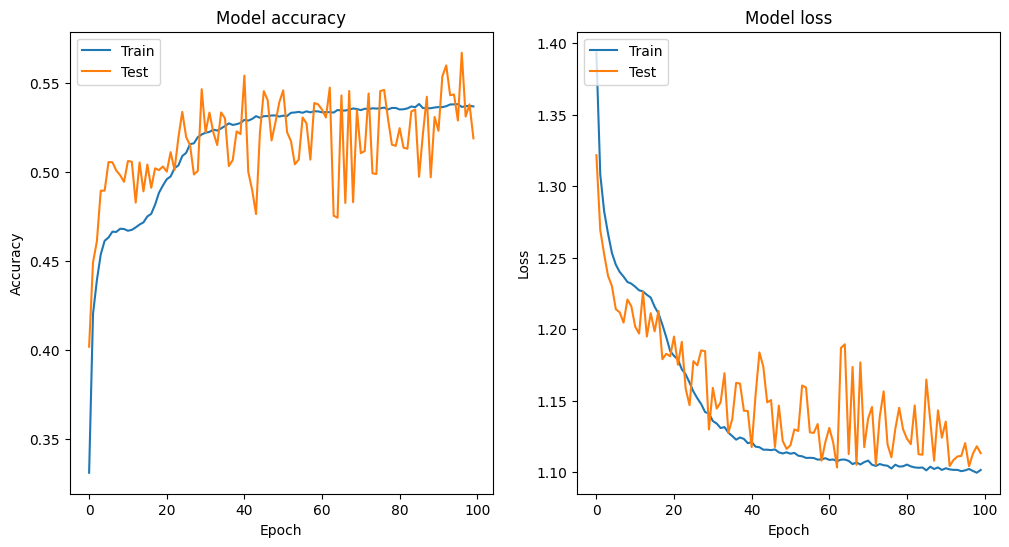

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Define constants
# n_samples = 1000
n_steps = 10
n_features = 26
n_classes = 5

train_size = int(len(X)*0.8)
test_size = len(X) - train_size

X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y_[:train_size], y_[train_size:]

model = Sequential([
    LSTM(100, input_shape=(n_steps, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


#TABPFN:

In [10]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=4)
classifier.model

(inf,
 inf,
 TransformerModel(
   (transformer_encoder): TransformerEncoderDiffInit(
     (layers): ModuleList(
       (0-11): 12 x TransformerEncoderLayer(
         (self_attn): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
         )
         (linear1): Linear(in_features=512, out_features=1024, bias=True)
         (dropout): Dropout(p=0.0, inplace=False)
         (linear2): Linear(in_features=1024, out_features=512, bias=True)
         (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
         (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
         (dropout1): Dropout(p=0.0, inplace=False)
         (dropout2): Dropout(p=0.0, inplace=False)
       )
     )
   )
   (encoder): Linear(in_features=100, out_features=512, bias=True)
   (y_encoder): Linear(in_features=1, out_features=512, bias=True)
   (decoder): Sequential(
     (0): Linear(in_features=512, out_features=1024, bias=True)


In [11]:
d_new={}
y_new=[]
count=0
for i in y_data:
  if i not in d_new:
    d_new[i]=count
    count+=1
  y_new.append(d_new[i])


In [12]:
y_new = np.array(y_new)

In [21]:
train_size = int(len(X_data) -3000)
test_size = 3000

X_train, X_test, y_train, y_test = X_data[:train_size], X_data[train_size:train_size+3000], y_new[:train_size], y_new[train_size:train_size+3000]

In [15]:
test_size

49920

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer



n_subsets = len(X_train) // 3000
models = []

# Train models on subsets
for i in range(n_subsets):
    print(i)
    X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - (3000 / len(X_train)), random_state=i)
    classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=4)
    classifier.fit(X_subset, y_subset,overwrite_warning=True)
    models.append(classifier)

# Make predictions on test data using all models



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


In [30]:
predictions_y = []
pred_p=[]
count=0
for model in models:
    print(count)
    y_eval, p_eval = model.predict(X_test, return_winning_probability=True)
    predictions_y.append(y_eval)
    pred_p.append(p_eval)
    count+=1
# Aggregate predictions (e.g., majority voting for classification)
final_predictions = np.mean(predictions_y, axis=0)

# Evaluate the final predictions
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy:", accuracy)

0


C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


1


C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


2


C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [ ]:
majority_votes = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions_y)



In [28]:
majority_votes

array([2, 0, 0, ..., 3, 3, 3], dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test, majority_votes)
print("Accuracy:", accuracy)

Accuracy: 0.6123333333333333


In [25]:
final_predictions

array([1.86666667, 0.        , 0.6       , ..., 2.93333333, 2.53333333,
       2.4       ])

In [22]:
start = time.time()
print("Fitting")
classifier.fit(X_train, y_train,overwrite_warning=True)
print("Predicting")
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
prediction_time = time.time() - start

Fitting
Predicting


C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
